In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [4]:
filename1a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOuta = Dataset(filename1a)

for dimobj in StateOuta.variables.values():
    print dimobj

filename2a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOuta = Dataset(filename2a)

#for dimobj in GridOuta.variables.values():
#    print dimobj

filename1b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/stateGlob.nc'
StateOutb = Dataset(filename1b)


filename2b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/gridGlob.nc'
GridOutb = Dataset(filename2b)


RhoRefCNT = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/RhoRef'))
RhoRef3D = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/RhoRef'))

<type 'netCDF4.Variable'>
float32 Eta(T, Y, X)
    long_name: free-surface_r-anomaly
    units: m
    coordinates: XC YC iter
unlimited dimensions: T
current shape = (19, 360, 360)
filling off

<type 'netCDF4.Variable'>
float64 T(T)
    long_name: model_time
    units: s
unlimited dimensions: T
current shape = (19,)
filling off

<type 'netCDF4.Variable'>
float64 X(X)
    long_name: X-coordinate of cell center
    units: meters
unlimited dimensions: 
current shape = (360,)
filling off

<type 'netCDF4.Variable'>
float64 Y(Y)
    long_name: Y-Coordinate of cell center
    units: meters
unlimited dimensions: 
current shape = (360,)
filling off

<type 'netCDF4.Variable'>
float32 S(T, Z, Y, X)
    long_name: salinity
    coordinates: XC YC RC iter
unlimited dimensions: T
current shape = (19, 90, 360, 360)
filling off

<type 'netCDF4.Variable'>
float64 Z(Z)
    long_name: vertical coordinate of cell center
    units: meters
    positive: up
unlimited dimensions: 
current shape = (90,)
filling

/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/RhoRef.meta
/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/RhoRef.meta


In [6]:
zl = StateOuta.variables['Zl']
z = StateOuta.variables['Z']
print zl[:]
print z[:]

[    0.    -5.   -10.   -15.   -20.   -25.   -30.   -35.   -40.   -45.
   -50.   -55.   -60.   -65.   -70.   -75.   -80.   -85.   -90.   -95.
  -100.  -105.  -110.  -115.  -120.  -125.  -130.  -135.  -140.  -145.
  -150.  -155.  -160.  -165.  -170.  -180.  -190.  -200.  -210.  -220.
  -230.  -240.  -250.  -260.  -280.  -300.  -320.  -340.  -360.  -380.
  -400.  -420.  -440.  -460.  -480.  -500.  -520.  -540.  -560.  -580.
  -600.  -620.  -640.  -660.  -680.  -700.  -720.  -740.  -760.  -780.
  -800.  -820.  -840.  -860.  -880.  -900.  -920.  -940.  -960.  -980.
 -1000. -1020. -1040. -1060. -1080. -1100. -1120. -1140. -1160. -1180.]
[   -2.5    -7.5   -12.5   -17.5   -22.5   -27.5   -32.5   -37.5   -42.5
   -47.5   -52.5   -57.5   -62.5   -67.5   -72.5   -77.5   -82.5   -87.5
   -92.5   -97.5  -102.5  -107.5  -112.5  -117.5  -122.5  -127.5  -132.5
  -137.5  -142.5  -147.5  -152.5  -157.5  -162.5  -167.5  -175.   -185.
  -195.   -205.   -215.   -225.   -235.   -245.   -255.   -270.   -29

In [5]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

Bs = 7.4E-4 # ppt^-1
At = 2.0E-4 # K^-1

zl = StateOuta.variables['Zl']
z = StateOuta.variables['Z']
#print(z[10])
Time = StateOuta.variables['T']
#print(Time[:])
xc = rout.getField(filename2a, 'XC') # x coords tracer cells
yc = rout.getField(filename2a, 'YC') # y coords tracer cells

drF = GridOuta.variables['drF'] # vertical distance between faces
dxG = rout.getField(filename2a,'dxG')
bathy = rout.getField(filename2a, 'Depth')

rA = rout.getField(filename2a, 'rA') # area of cells (x-y)
hFacC = rout.getField(filename2a, 'HFacC')
MaskC = rout.getMask(filename2a,'HFacC') # same for both runs

In [6]:
TempCNT = rout.getField(filename1a,'Temp') # T and S of CNT run (run13)
SaltCNT = rout.getField(filename1a,'S')

In [7]:
Temp3D = rout.getField(filename1b,'Temp') # T and S of Kzdiff3D run (run01)
Salt3D = rout.getField(filename1b,'S')

In [8]:
Bs = 7.4E-4 # Haline and thermal expansion coefficients of linear EoS
At = 2.0E-4

ThetaRef = TempCNT[0,0,180,180]
SRef = SaltCNT[0,0,180,180]

In [9]:
filename1c='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/stateGlob.nc'
StateOutc = Dataset(filename1c)

filename2c='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/gridGlob.nc'
GridOutc = Dataset(filename2c)

RhoRefNoC = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/RhoRef'))


/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/RhoRef.meta


In [10]:
TempNoC = rout.getField(filename1c,'Temp')
SaltNoC = rout.getField(filename1c,'S')

MaskNoC = rout.getMask(filename2c,'HFacC') 
hFacCNoC = rout.getField(filename2c,'HFacC') 
rANoC = rout.getField(filename2c,'rA') 

In [11]:
drFNoC= GridOutc.variables['drF']

### How much water with density >= rho[zi=27, x,y in open water] is there on the shelf at a given time? 

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


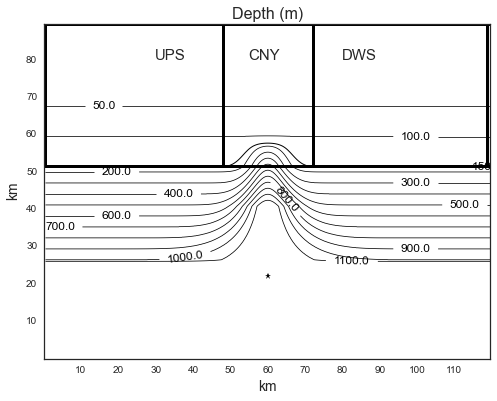

In [12]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))
sns.set_style('white')
### Across-Shelf Planes ###
plt.plot(xc[197:,120],yc[197:,120],'-', linewidth=3, linestyle='-', color='0.0')
plt.plot(xc[197:,240],yc[197:,240],'-',linewidth=3, linestyle='-', color='0.0' )

### Along Shelf Planes ###
plt.plot(xc[197,:120],yc[197,:120],'-',linewidth=3, linestyle='-', color='0.0' )
plt.plot(xc[197,120:240],yc[197,120:240],'-',linewidth=3, linestyle='-', color='0.0' )
plt.plot(xc[197,240:360],yc[197,240:360],'-',linewidth=3, linestyle='-', color='0.0' )


plt.plot(xc[359,:],yc[359,:],'-',linewidth=3, linestyle='-', color='0.0' )
plt.plot(xc[197:,358],yc[197:,358],'-',linewidth=3, linestyle='-', color='0.0' )
plt.plot(xc[197:,0],yc[197:,0],'-',linewidth=3, linestyle='-', color='0.0' )

plt.plot(xc[50,180],yc[50,180],'k*' )

lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)


plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)

plt.annotate('UPS', xy=(30000, 80000), xytext=(30000, 80000))

plt.annotate('CNY', xy=(55000, 80000), xytext=(55000, 80000))

plt.annotate('DWS', xy=(80000, 80000), xytext=(80000, 80000))



#plt.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/UPS_CNY_DNS_map.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


The idea is to calculate the amount of water with certain characteristics is inside each box (UPS,CNY,DWN) at each day. This boxes go from shelf break depth all the way to the surface. The y index of the shelf is 197, z index is 28. The mask to be used should be the one for the no canyon case, otherwise the water within the canyon at z[28] would be taken into account.


In [13]:
def HowMuchWaterRho(Temp,Salt,T0,S0,MaskC,RhoRef,nzlim,Bs,At,rA,hFacC,drF):
    '''nzlim  is the nz index under which to look for water properties
    '''

    TotWaterUPSRho= np.zeros(nt)
    
    TotWaterCNYRho= np.zeros(nt)
    
    TotWaterDNSRho= np.zeros(nt)
    
    TempMask0=np.ma.array(Temp[0,:,:,:],mask=MaskC[:,:,:])
    SaltMask0=np.ma.array(Salt[0,:,:,:],mask=MaskC[:,:,:])
    
    RhoRef0 = RhoRef[0] 
    
    sigmalim = RhoRef0*(1.0+(Bs*(SaltMask0[nzlim,50,180]-S0)) - (At*(TempMask0[nzlim,50,180]-T0)))
    
    print('density limit is: ',sigmalim)
    
    for tt in range(0,nt,1) :
        
        TempMask=np.ma.array(Temp[tt,:,:,:],mask=MaskC[:,:,:])
        SaltMask=np.ma.array(Salt[tt,:,:,:],mask=MaskC[:,:,:])
        
        sigma = RhoRef0*(1.0+(Bs*(SaltMask-S0)) - (At*(TempMask-T0)))
        
        #Box UPS
        for ii,rho in np.ndenumerate(sigma[:,197:,:120]) :
            if rho >= sigmalim:
                TotWaterUPSRho[tt] = TotWaterUPSRho[tt] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]
                
        #Box CNY
        for ii,rho in np.ndenumerate(sigma[:,197:,120:240]) :
            if rho >= sigmalim:
                TotWaterCNYRho[tt] = TotWaterCNYRho[tt] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]
                
        #Box CNY
        for ii,rho in np.ndenumerate(sigma[:,197:,240:]) :
            if rho >= sigmalim:
                TotWaterDNSRho[tt] = TotWaterDNSRho[tt] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]
                
    return(TotWaterUPSRho,TotWaterCNYRho,TotWaterDNSRho)
            
     

In [18]:
def HowMuchWaterTemp(Temp,MaskC,nzlim,rA,hFacC,drF,nt):
    '''nzlim  is the nz index under which to look for water properties
    '''

    TotWaterUPSTemp= np.zeros(nt)
    
    TotWaterCNYTemp= np.zeros(nt)
    
    TotWaterDNSTemp= np.zeros(nt)
    
    
    Tlim = Temp[0,30,50,180]
    
    print('Temperature limit is: ',Tlim)
    
    for tt in range(0,nt,1) :
        print(tt)
        TempMask=np.ma.array(Temp[tt,:,:,:],mask=MaskC[:,:,:])
        
        #Box UPS
        for ii,T in np.ndenumerate(TempMask[:28,197:,:120]) :
            if T <= Tlim:
                TotWaterUPSTemp[tt] = TotWaterUPSTemp[tt] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]
                
        #Box CNY
        for ii,T in np.ndenumerate(TempMask[:28,197:,120:240]) :
            if T <= Tlim:
                TotWaterCNYTemp[tt] = TotWaterCNYTemp[tt] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]
                
        #Box CNY
        for ii,T in np.ndenumerate(TempMask[:28,197:,240:]) :
            if T <= Tlim:
                TotWaterDNSTemp[tt] = TotWaterDNSTemp[tt] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]
                
    return(TotWaterUPSTemp,TotWaterCNYTemp,TotWaterDNSTemp)
            
     

In [19]:
TotWaterUPSCNT,TotWaterCNYCNT,TTotWaterDNSCNT=HowMuchWaterTemp(TempCNT,MaskNoC,30,rA,hFacCNoC,drFNoC,nt)

TotWaterUPSNoC,TotWaterCNYNoC,TotWaterDNSNoC=HowMuchWaterTemp(TempNoC,MaskNoC,30,rANoC,hFacCNoC,drFNoC,nt)

TotWaterUPS3D,TotWaterCNY3D,TotWaterDNS3D=HowMuchWaterTemp(Temp3D,MaskNoC,30,rA,hFacCNoC,drFNoC,nt)




('Temperature limit is: ', 12.619246)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
('Temperature limit is: ', 12.619246)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
('Temperature limit is: ', 12.619246)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


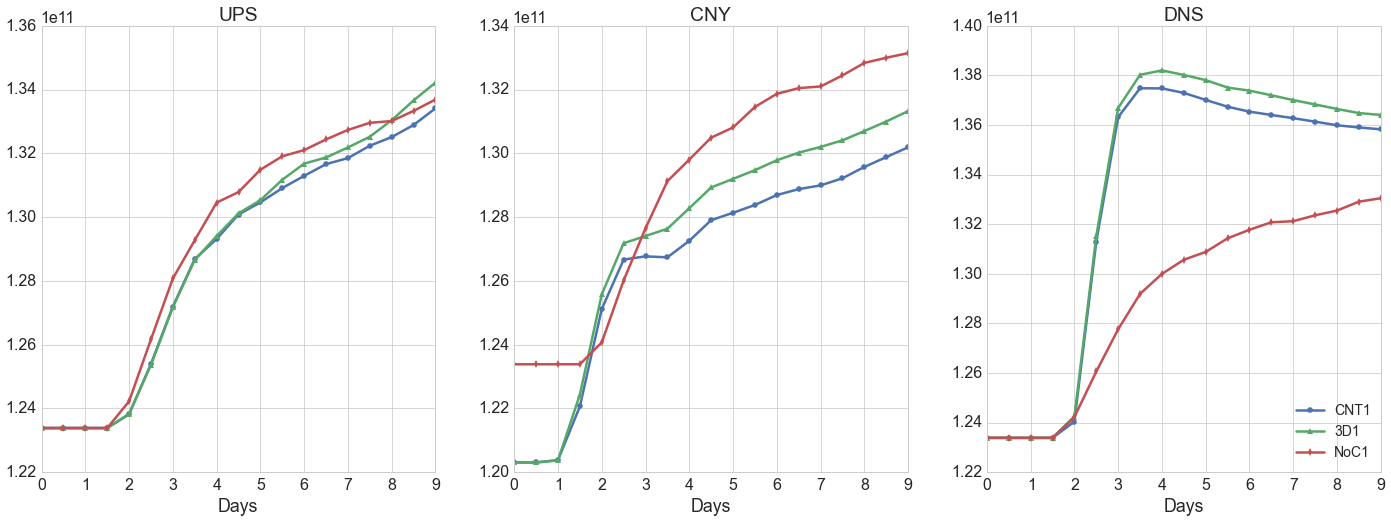

In [20]:
fig45=plt.figure(figsize=(24,8))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})

plt.subplot(1,3,1)
ax = plt.gca()


plt.plot(np.linspace(0,9,19),TotWaterUPSCNT,'o-',label=('CNT1' ))
plt.plot(np.linspace(0,9,19),TotWaterUPS3D,'^-',label=('3D1'))
plt.plot(np.linspace(0,9,19),TotWaterUPSNoC,'d-',label=('NoC1' ))

#plt.ylabel('Volume of water with $\Theta$ >  $^{\circ}$ ($m^3$)')
plt.xlabel('Days')


plt.title('UPS')
##### 
plt.subplot(1,3,2)
ax = plt.gca()

plt.plot(np.linspace(0,9,19),TotWaterCNYCNT,'o-',label=('NCT1' ))
plt.plot(np.linspace(0,9,19),TotWaterCNY3D,'^-',label=('3D1'))
plt.plot(np.linspace(0,9,19),TotWaterCNYNoC,'d-',label=('NoC1' ))

plt.xlabel('Days')
plt.title('CNY')

######
plt.subplot(1,3,3)
ax = plt.gca()


plt.plot(np.linspace(0,9,19),TTotWaterDNSCNT,'o-',label=('CNT1' ))
plt.plot(np.linspace(0,9,19),TotWaterDNS3D,'^-',label=('3D1'))
plt.plot(np.linspace(0,9,19),TotWaterDNSNoC,'d-',label=('NoC1' ))

plt.xlabel('Days')
plt.title('DNS')
plt.legend(loc=4, fontsize=14)

##########################################################################
hFacCSwap = np.swapaxes(hFacC, 0, 2)
hFacCNoCSwap = np.swapaxes(hFacCNoC, 0, 2)

TotVolUPS = np.sum(np.sum(np.sum((np.swapaxes(hFacCNoCSwap[:120,197:,:28]*drF[:28],0,2))*rA[197:,:120],axis=0),axis=0),axis=0)
TotVolCNY = np.sum(np.sum(np.sum((np.swapaxes(hFacCNoCSwap[120:240,197:,:28]*drF[:28],0,2))*rA[197:,120:240],axis=0),axis=0),axis=0)
TotVolDNS = np.sum(np.sum(np.sum((np.swapaxes(hFacCNoCSwap[240:,197:,:28]*drF[:28],0,2))*rA[197:,240:],axis=0),axis=0),axis=0)

TotVolUPSNoC = np.sum(np.sum(np.sum((np.swapaxes(hFacCNoCSwap[:120,197:,:28]*drF[:28],0,2))*rANoC[197:,:120],axis=0),axis=0),axis=0)
TotVolCNYNoC = np.sum(np.sum(np.sum((np.swapaxes(hFacCNoCSwap[120:240,197:,:28]*drF[:28],0,2))*rANoC[197:,120:240],axis=0),axis=0),axis=0)
TotVolDNSNoC = np.sum(np.sum(np.sum((np.swapaxes(hFacCNoCSwap[240:,197:,:28]*drF[:28],0,2))*rANoC[197:,240:],axis=0),axis=0),axis=0)

#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/H2OVolOver_UPS_CNY_DNS_7p40.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')

#print('Total volume ($m^3$) on UPS is :', TotVolUPS)  
#print('Total volume ($m^3$) on CNY is :', TotVolCNY)  
#print('Total volume ($m^3$) on DNS is :', TotVolDNS)  
#print('Total volume ($m^3$) on UPSNoC is :', TotVolUPSNoC)  
#print('Total volume ($m^3$) on CNYNoC is :', TotVolCNYNoC)  
#print('Total volume ($m^3$) on DNSNoC is :', TotVolDNSNoC)  

<matplotlib.colorbar.Colorbar instance at 0x7efe38974560>

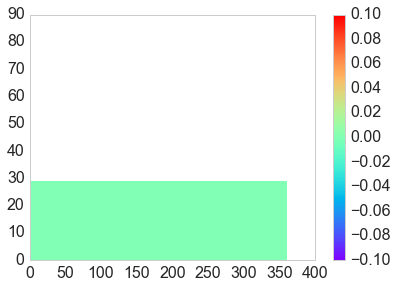

In [42]:
TempMask=np.ma.array(TempCNT[0,:,:,:],mask=MaskNoC[:,:,:])
plt.pcolor(TempMask[:,200,:]-TempNoC[0,:,200,:], cmap = 'rainbow')
plt.colorbar()

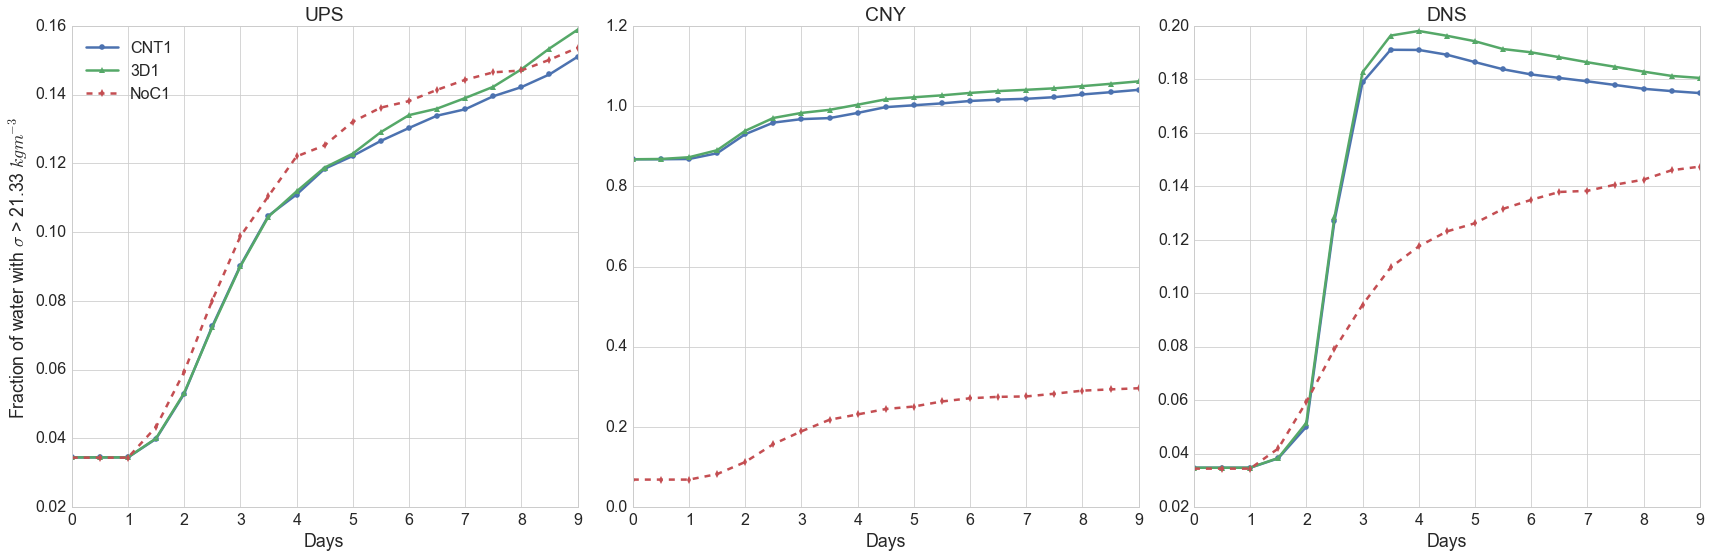

In [16]:
fig45=plt.figure(figsize=(24,8))
 
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})


plt.subplot(1,3,1)
ax = plt.gca()
    

plt.plot(np.linspace(0,9,19),TotWaterUPSCNT/TotVolUPS,'o-',label=('CNT1' ))
plt.plot(np.linspace(0,9,19),TotWaterUPS3D/TotVolUPS,'^-',label=('3D1'))
plt.plot(np.linspace(0,9,19),TotWaterUPSNoC/TotVolUPS,'d--',label=('NoC1' ))

plt.ylabel('Fraction of water with $\sigma_0$ > 21.33 $kg m^{-3}$ ')
plt.xlabel('Days')
plt.title('UPS')
leg = plt.legend(loc=0)
##### 
plt.subplot(1,3,2)
ax = plt.gca()
    

plt.plot(np.linspace(0,9,19),TotWaterCNYCNT/TotVolCNY,'o-',label=('NCT1' ))
plt.plot(np.linspace(0,9,19),TotWaterCNY3D/TotVolCNY,'^-',label=('3D1'))
plt.plot(np.linspace(0,9,19),TotWaterCNYNoC/TotVolCNY,'d--',label=('NoC1' ))

plt.xlabel('Days')
plt.title('CNY')

######
plt.subplot(1,3,3)
ax = plt.gca()
    

plt.plot(np.linspace(0,9,19),TTotWaterDNSCNT/TotVolDNS,'o-',label=('CNT1, $DiffKz = 10^{-5}$' ))
plt.plot(np.linspace(0,9,19),TotWaterDNS3D/TotVolDNS,'^-',label=('3D1, $DiffKz_{cny} = 10^{-3}$ \n ,$DiffKz_{out} = 10^{-5}$ '))
plt.plot(np.linspace(0,9,19),TotWaterDNSNoC/TotVolDNS,'d--',label=('NoC1, $DiffKz = 10^{-3}$' ))

plt.xlabel('Days')
plt.title('DNS')
    
plt.tight_layout()
#fig45.subplots_adjust(top=0.9)
#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/H2OVolOver_UPS_CNY_DNS_Fraction_7p40.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')




In [17]:

TotWaterUPSCNT2,TotWaterCNYCNT2,TTotWaterDNSCNT2=HowMuchWaterRho(TempCNT,SaltCNT,ThetaRef,SRef,MaskNoC,RhoRefCNT,32,Bs,At,rA,hFacCNoC,drFNoC)

TotWaterUPSNoC2,TotWaterCNYNoC2,TotWaterDNSNoC2=HowMuchWaterRho(TempNoC,SaltNoC,ThetaRef,SRef,MaskNoC,RhoRefNoC,32,Bs,At,rANoC,hFacCNoC,drFNoC)

TotWaterUPS3D2,TotWaterCNY3D2,TotWaterDNS3D2=HowMuchWaterRho(Temp3D,Salt3D,ThetaRef,SRef,MaskNoC,RhoRef3D,32,Bs,At,rA,hFacCNoC,drFNoC)


('density limit is: ', 21.368446065900017)
('density limit is: ', 21.368446065900017)
('density limit is: ', 21.368446065900017)


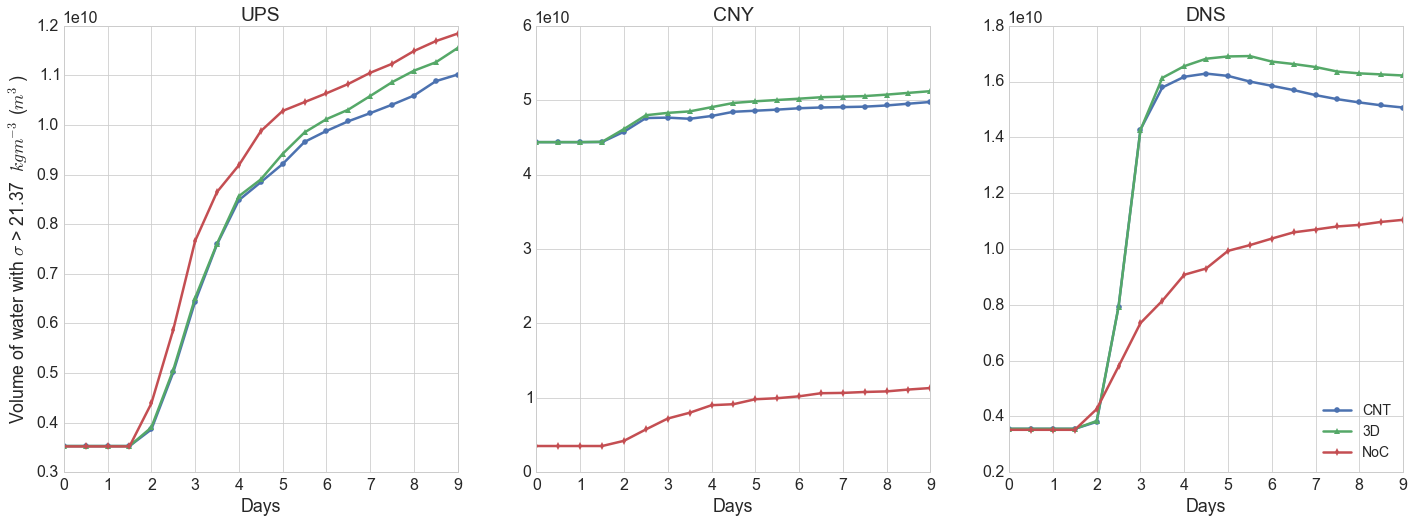

In [18]:
fig45=plt.figure(figsize=(24,8))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})

plt.subplot(1,3,1)
ax = plt.gca()


plt.plot(np.linspace(0,9,19),TotWaterUPSCNT2,'o-',label=('CNT1' ))
plt.plot(np.linspace(0,9,19),TotWaterUPS3D2,'^-',label=('3D1'))
plt.plot(np.linspace(0,9,19),TotWaterUPSNoC2,'d-',label=('NoC1' ))

plt.ylabel('Volume of water with $\sigma_0$ > 21.37  $kg m^{-3}$ ($m^3$)')
plt.xlabel('Days')
plt.title('UPS')
##### 
plt.subplot(1,3,2)
ax = plt.gca()

plt.plot(np.linspace(0,9,19),TotWaterCNYCNT2,'o-',label=('NCT' ))
plt.plot(np.linspace(0,9,19),TotWaterCNY3D2,'^-',label=('3D'))
plt.plot(np.linspace(0,9,19),TotWaterCNYNoC2,'d-',label=('NoC' ))

plt.xlabel('Days')
plt.title('CNY')

######
plt.subplot(1,3,3)
ax = plt.gca()

plt.plot(np.linspace(0,9,19),TTotWaterDNSCNT2,'o-',label=('CNT' ))
plt.plot(np.linspace(0,9,19),TotWaterDNS3D2,'^-',label=('3D'))
plt.plot(np.linspace(0,9,19),TotWaterDNSNoC2,'d-',label=('NoC' ))

plt.xlabel('Days')
plt.title('DNS')
plt.legend(loc=4, fontsize=14)

#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/H2OOverShelf_UPS_CNY_DNS_7p75.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


In [19]:
def HowMuchWaterRhoX(Temp,Salt,T0,S0,MaskC,RhoRef,nzlim,rA,hFacC,drF,tt,nx,dx):
    '''
    INPUT----------------------------------------------------------------------------------------------------------------
    Temp  : Array with Temps 360x360x90
    Salt  : Array with salinities. Until this function is more general, this should be size 19x90x360x360
    T0    : Reference potential temperature (at p=0)
    S0    : Reference salinity (at p=0)
    MaskC : Land mask for temp
    RhoRef: Density reference 360,360,90
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    tt    : Time slice to calculate. Int 0<=tt<19
    nx    : x dimension (along shelf) 
    dx    : 
    OUTPUT----------------------------------------------------------------------------------------------------------------
    WaterX = (360) Arrays with the volume of water with density > some value at each x-position over the shelf [tt,:28,:197,xx]
                                                
    -----------------------------------------------------------------------------------------------------------------------
    '''
    WaterX= np.zeros(nx)
    
    
    TempMask0=np.ma.array(Temp[0,:,:,:],mask=MaskC[:,:,:])
    SaltMask0=np.ma.array(Salt[0,:,:,:],mask=MaskC[:,:,:])
    RhoRef0 = RhoRef[0]   
    sigmalim = RhoRef0*(Bs*(SaltMask0[nzlim,50,180]-S0) - At*(TempMask0[nzlim,50,180]-T0) )
    
    #print('tracer limit is: ',trlim)
    
    
    TempMask=np.ma.array(Temp[tt,:,:,:],mask=MaskC[:,:,:])
    SaltMask=np.ma.array(Salt[tt,:,:,:],mask=MaskC[:,:,:])
        
    sigma = RhoRef0(Bs*(SaltMask-S0) - At*(TempMask-T0))
        
    for ii,trac in np.ndenumerate(sigma[:28,197:,:]) :
        if trac >= sigmalim:
             WaterX[ii[2]] = WaterX[ii[2]] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]/dx[ii[1],ii[2]]
                
                
    return(WaterX,sigma)
            

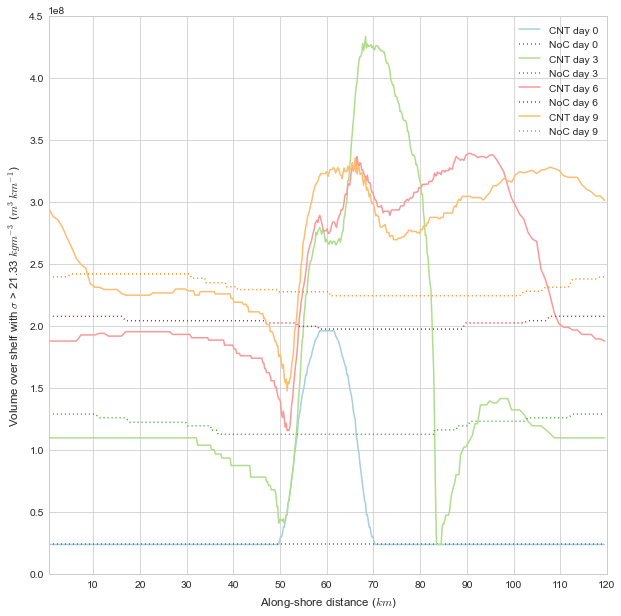

In [20]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3, rc={"lines.linewidth": 1.5})

pairs=['#9428ae' , '#b23ad0','#283da3','#425cdf','#2e9031','#5ca85e','#dc3b00','#c03545']

with sns.color_palette('Paired',8):
    for time in range(0,19,6):

        (WaterXCNT,sigmaCNT)= HowMuchWaterRhoX(TempCNT,SaltCNT,MaskNoC,RhoRefCNT,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        (WaterXNoC,sigmaNoC) = HowMuchWaterRhoX(TempNoC,SaltNoC,MaskNoC,RhoRefNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)

        plt.plot(xc[0,:],(WaterXCNT)*1000.0,'-',label=('CNT day %d' %(time/2.0))) # 1000m/km
        plt.plot(xc[0,:],(WaterXNoC)*1000.0,':',label=('NoC day %d' %(time/2.0)))

        plt.ylabel('Volume over shelf with $\sigma_0$ > 21.33 $kg m^{-3}$ ($m^3 km^{-1}$)')
        plt.xlabel('Along-shore distance ($km$)')
        labels = [10,20,30,40, 50, 60, 70, 80,90,100,110,120]
        plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000], labels)
        plt.legend(loc=0)

        

#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/H20TrPerKm3DCNT1-NoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')

    
    

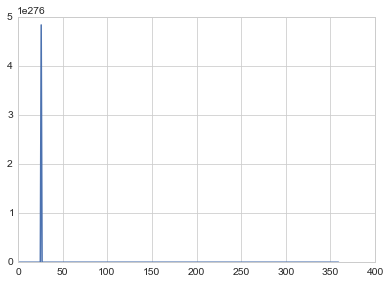

In [21]:
WaterX = np.empty((360))
RhoRef2 = np.empty((90,360,360))
for ii in range(0,360,1):
    for jj in range(0,360,1):
        RhoRef2[:,ii,jj] = RhoRefCNT
    
TempMask0CNT=np.ma.array(TempCNT[0,:,:,:],mask=MaskNoC[:,:,:])
SaltMask0CNT=np.ma.array(SaltCNT[0,:,:,:],mask=MaskNoC[:,:,:])

sigmaCNT = RhoRef2*(Bs*SaltMask0CNT - At*TempMask0CNT)
#plt.pcolor(sigmaCNT[30,:,:],cmap = 'RdBu')
#plt.colorbar()

for ii,trac in np.ndenumerate(sigmaCNT[:30,197:,:]) :
    if trac >= 21.33:
        WaterX[ii[2]] = WaterX[ii[2]] + (hFacCNoC[ii]*drFNoC[ii[0]]*rANoC[ii[1],ii[2]])/dxG[ii[1],ii[2]]
plt.plot(WaterX)   

In [22]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3, rc={"lines.linewidth": 1.5})

pairs=['#9428ae' , '#b23ad0','#283da3','#425cdf','#2e9031','#5ca85e','#dc3b00','#c03545']

with sns.color_palette('Paired',8):
    for time in range(0,19,6):

        WaterXCNT= HowMuchWaterRhoX(TempCNT,SaltCNT,MaskNoC,RhoRefCNT,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        WaterX3D = HowMuchWaterRhoX(Temp3D,Salt3D,MaskNoC,RhoRef3D,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        
        plt.plot(xc[0,:],(WaterXCNT)*1000.0,'-',label=('CNT day %d' %(time/2.0))) # 1000m/km
        plt.plot(xc[0,:],(WaterX3D)*1000.0,'--',label=('3D day %d' %(time/2.0)))
        
        plt.ylabel('Volume over shelf with $\sigma_0$ > 21.33 $kg m^{-3}$ ($m^3 km^{-1}$)')
        plt.xlabel('Along-shore distance ($km$)')
        labels = [10,20,30,40, 50, 60, 70, 80,90,100,110,120]
        plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000], labels)
        plt.legend(loc=0)

        

#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/H20TrPerKm3DCNT1-NoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')

    

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3, rc={"lines.linewidth": 1.5})

pairs=['#9428ae' , '#b23ad0','#283da3','#425cdf','#2e9031','#5ca85e','#dc3b00','#c03545']

with sns.color_palette('Paired',8):
    for time in range(0,19,6):

        WaterXCNT= HowMuchWaterRhoX(TempCNT,SaltCNT,MaskNoC,RhoRefCNT,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        WaterX3D = HowMuchWaterRhoX(Temp3D,Salt3D,MaskNoC,RhoRef3D,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        WaterXNoC = HowMuchWaterRHoX(TempNoC,SaltNoC,MaskNoC,RhoRefNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)

        plt.plot(xc[0,:],(WaterXCNT-WaterXNoC)*1000.0,'-',label=('CNT-NoC day %d' %(time/2.0))) # 1000m/km
        plt.plot(xc[0,:],(WaterX3D-WaterXNoC)*1000.0,'--',label=('3D-NoC day %d' %(time/2.0)))
        
        plt.ylabel('Volume over shelf with $\sigma_0$ > 21.33 $kg m^{-3}$ ($m^3 km^{-1}$)')
        plt.xlabel('Along-shore distance ($km$)')
        labels = [10,20,30,40, 50, 60, 70, 80,90,100,110,120]
        plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000], labels)
        plt.legend(loc=0)

        

#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/H20TrPerKm3DCNT1-NoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


In [ ]:
TotWaterXCNT = np.empty(19)
TotWaterX3D = np.empty(19)
TotWaterXNoC = np.empty(19)



for time in range(0,19,1):
    print(time)    
    
    WaterXCNT= HowMuchWaterRhoX(TempCNT,SaltCNT,MaskNoC,,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    WaterX3D = HowMuchWaterRhoX(Temp3D,Salt3D,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    WaterXNoC = HowMuchWaterRHoX(TempNoC,SaltNoC,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)

        
    TotWaterXCNT[time] = np.sum((WaterXCNT)*dxG[0,:])
    TotWaterX3D[time] = np.sum((WaterX3D)*dxG[0,:])
    TotWaterXNoC[time] = np.sum((WaterXNoC)*dxG[0,:])
    
        
        


In [ ]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)

gb = ['#008a31','#9428ae','r']

with sns.color_palette(gb):
    
    line1 = plot(times/2.0,TotWaterXCNT,'o-',label='CNT')
    line2 = plot(times/2.0,TotWaterX3D1'o-',label='3D')
    line2 = plot(times/2.0,TotWaterXNoC,'o-',label='NoC')

    plt.ylabel('Volume over shelf with $\sigma$ > 21.33 $kg m^{-3}$ ($m^3$)')
    plt.xlabel('Day')
    
   
handles, labels = plt.get_legend_handles_labels()
plt.legend(handles, labels,loc=5)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


In [ ]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)

gb = ['#008a31','#9428ae']

with sns.color_palette(gb):
    
    
    line1 = plt.plot(times/2.0,TotWaterXCNT1-TotWaterXNoC1,'o-',label='CNT1-NoC1')
    line2 = plt.plot(times/2.0,TotWaterX3D1-TotWaterXNoC1,'o-',label='3D-NoC1')

    plt.ylabel('Water vol. over shelf with C > 7.40 $umol$ $l^{-1}$ ($m^3$)')
    plt.xlabel('Day')
    
handles, labels = plt.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], loc=5)
   
#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelf3DCNT1-NoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


In [ ]:
TotTrDomCNT1 = np.empty(19)
TotTrDom3D1 = np.empty(19)
TotTrDomCNT2 = np.empty(19)
TotTrDomNoC1 = np.empty(19)
TotTrDomNoC2 = np.empty(19)

for time in range(0,19,1):
    print(time)    

    TotTrDomCNT1[time] = TotalTracerInDomain(Tr1CNT,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTrDom3D1[time] = TotalTracerInDomain(Tr13D,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTrDomCNT2[time] = TotalTracerInDomain(Tr2CNT,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTrDomNoC1[time] = TotalTracerInDomain(Tr2NoC,MaskNoC,rANoC,hFacCNoC,drF,time,nx,dxG)
    TotTrDomNoC2[time] = TotalTracerInDomain(Tr1NoC,MaskNoC,rANoC,hFacCNoC,drF,time,nx,dxG)


In [ ]:
fig66=plt.figure(figsize=(10,6))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)
gb = ['#008a31','#9428ae','#007dc1']
with sns.color_palette(gb):
        
    ax1 = plt.subplot(2,1,1)
    line1 = plt.plot(times/2.0,TotTrDomCNT1*1.E-6,'o-', label='CNT1')
    line2 = plt.plot(times/2.0,TotTrDom3D1*1.E-6,'o-', label='3D')
    line3 = plt.plot(times/2.0,TotTrDomCNT2*1.E-6,'o-', label='CNT2')
        
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    handles, labels =ax1.get_legend_handles_labels()
    ax1.legend(handles, labels,loc = 5)
    
    ax2 = plt.subplot(2,1,2)
    line5 = plt.plot(times/2.0,TotTrDomNoC2*1.E-6,'yo-', label='NoC2')
    line4 = plt.plot(times/2.0,TotTrDomNoC1*1.E-6,'ro-', label='NoC1')
        
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    handles, labels =ax2.get_legend_handles_labels()
    ax2.legend(handles, labels,loc=5)

#

fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TotalTracerInDomain.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')




In [ ]:
print(-TotTrDomCNT1[0]+TotTrDomCNT1[18])
print(-TotTrDom3D1[0]+TotTrDom3D1[18])
print(-TotTrDomCNT2[0]+TotTrDomCNT2[18])
print(-TotTrDomNoC1[0]+TotTrDomNoC1[18])
print(-TotTrDomNoC2[0]+TotTrDomNoC2[18])